# Data Analysis

### Project Proposal / Outline

Our project is to uncover patterns in worldwide suicide rates. We will examine the relationships between number of suicides across multiple countries, years, genders, ages and several demographic and socioeconomic factors in order to understand if there are underlying factors influencing suicide rates across the world.

### Team Members
* Ayala, Enrique
* Burnes, Javier
* Guarnieri, Richard
* Macias, Erick
* Rello, Carlos

### Setup

In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm

# magic functions
%matplotlib inline

# seaborn style
sns.set(style='darkgrid')

### Import Data

In [2]:
# import cleaned_data.csv from DataCleaning.ipynb
cleaned_csv = pd.read_csv('cleaned_data.csv', dtype={'year': 'object'})

# load into DataFrame
df = pd.DataFrame(cleaned_csv)

# display df
df.head(3)

,country,year,sex,age,suicides,population,suicides/100k,generation,HDI,fertility_rate,...,GDP_pc_curr_LCU,GDP_pc_curr_US$,GDP_pc_PPP_constant_2011_intl_$,GDP_pc_PPP_current_intl_$,GDP_PPP_cons_2011_intl_$,GDP_PPP_curr_intl_$,GNI_curr_LCU,GNI_pc_curr_LCU,GNI_pc_Atlas_curr_US$,GNI_pc_PPP_curr_intl_$
0,Albania,1987,male,15-24 years,21,312900,6.71,Generation X,NaN,3.164,...,5398.34706,674.79338,NaN,NaN,NaN,NaN,1.664957e+10,5399.38481,730.0,NaN
1,Albania,1987,male,35-54 years,16,308000,5.19,Silent,NaN,3.164,...,5398.34706,674.79338,NaN,NaN,NaN,NaN,1.664957e+10,5399.38481,730.0,NaN
2,Albania,1987,female,15-24 years,14,289700,4.83,Generation X,NaN,3.164,...,5398.34706,674.79338,NaN,NaN,NaN,NaN,1.664957e+10,5399.38481,730.0,NaN


### Data Analysis

#### Histogram - Suicides per Country (1987-2015)

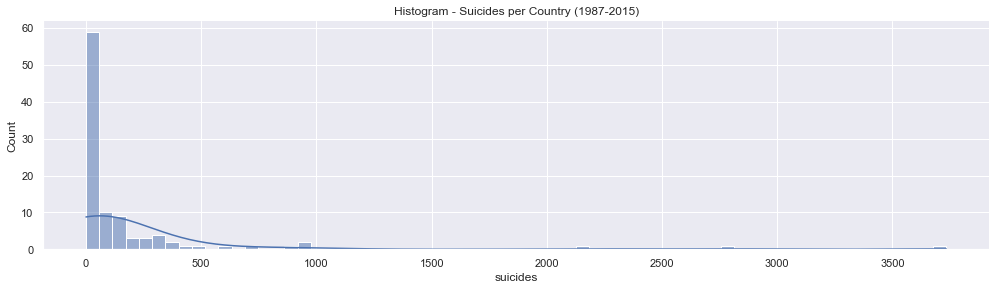

In [3]:
# create plot_df
plot_df = df.groupby(['country']).agg({'suicides': 'mean'})

#create plot
sns.displot(data=plot_df, x='suicides', kde=True, height=4, aspect=3.5)
plt.title('Histogram - Suicides per Country (1987-2015)')
plt.savefig("Images/histogram.png")
plt.show()

#### Plot - Suicides over the years (1987-2015)

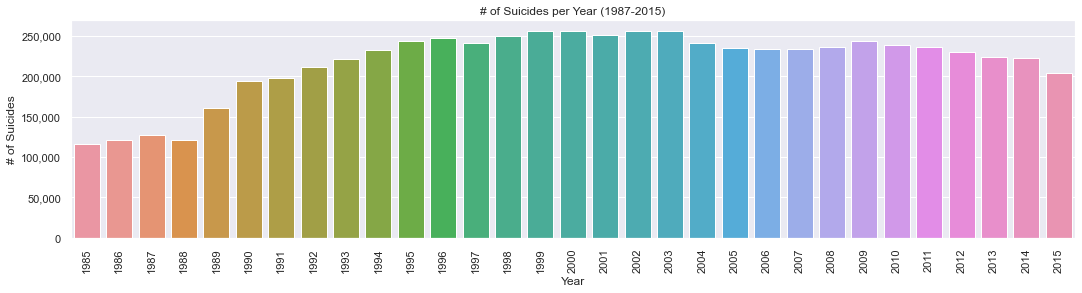

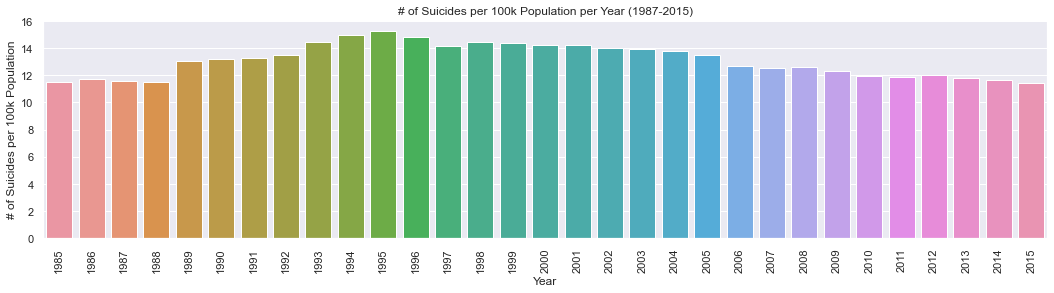

In [4]:
# create plot_df1
plot_df1 = df.groupby(['year']).agg({'suicides': 'sum'})

# create plot_df2
plot_df2 = df.groupby(['year']).agg({
    'suicides': 'sum', 
    'population': 'sum',
})
plot_df2['suicides/100k'] = (plot_df2['suicides'] / plot_df2['population']) * 100000

#create plot
fig, ax = plt.subplots(figsize=(18, 4))

sns.barplot(data=plot_df1,
            x=plot_df1.index.get_level_values('year'),
            y='suicides',
            estimator=np.sum,
            ci=None)
ax.set_title('# of Suicides per Year (1987-2015)')
ax.set_xlabel('Year')
ax.set_ylabel('# of Suicides')
plt.xticks(rotation=90)
# add format to y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_per_year.png")

plt.show()

#create plot
fig, ax = plt.subplots(figsize=(18, 4))
sns.barplot(data=plot_df2,
            x=plot_df2.index.get_level_values('year'),
            y='suicides/100k',
            estimator=np.sum,
            ci=None)
ax.set_title('# of Suicides per 100k Population per Year (1987-2015)')
ax.set_xlabel('Year')
ax.set_ylabel('# of Suicides per 100k Population')
plt.xticks(rotation=90)
# add format to y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides100k_per_year.png")

plt.show()

#### Plot - # of Suicides per Country (1987-2015)

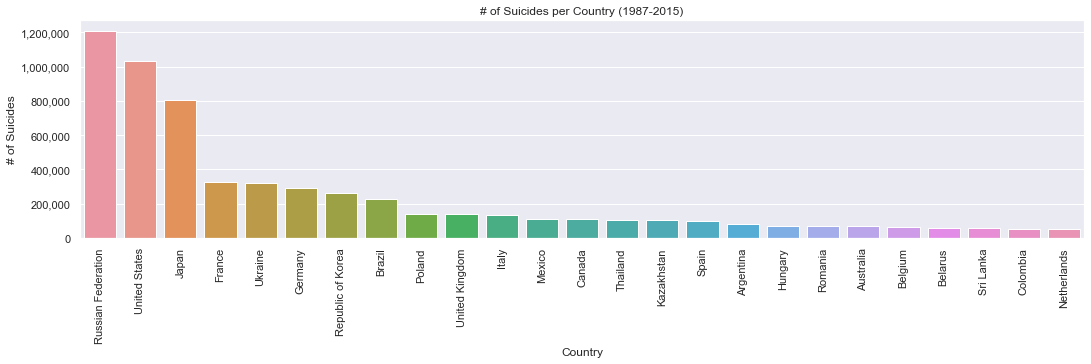

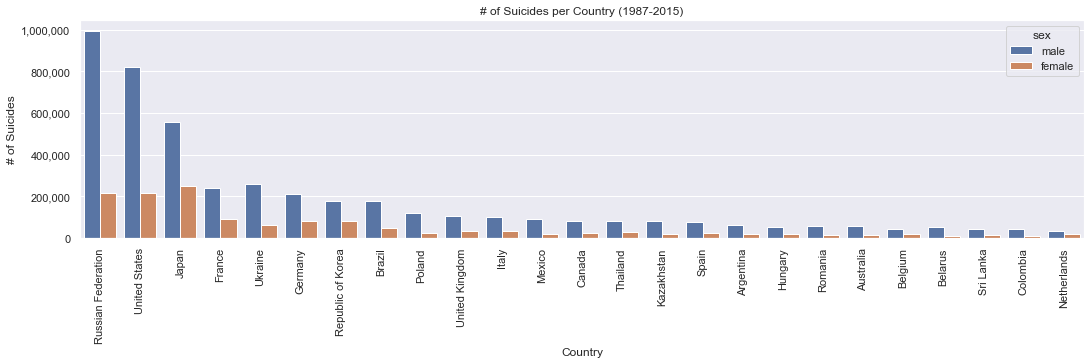

In [5]:
# create plot_df
plot_df = df.groupby(['country', 'sex']).agg({'suicides': 'sum'})
plot_df.reset_index(level=1, inplace=True)

# create order for plot_df
order = df.groupby(['country']).agg({'suicides': 'sum'}).sort_values(by='suicides', ascending=False).index

#create plot
fig, ax = plt.subplots(figsize=(18, 4))

sns.barplot(data=plot_df,
            x=plot_df.index.get_level_values('country'),
            y='suicides',
            estimator=np.sum,
            ci=None,
            order=order[:25])
ax.set_title('# of Suicides per Country (1987-2015)')
ax.set_xlabel('Country')
ax.set_ylabel('# of Suicides')
plt.xticks(rotation=90)
# add format to y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_per_country.png")

plt.show()

#create plot
fig, ax = plt.subplots(figsize=(18, 4))
sns.barplot(data=plot_df,
            x=plot_df.index.get_level_values('country'),
            y='suicides',
            estimator=np.sum,
            ci=None,
            hue='sex',
            hue_order=['male', 'female'],
            order=order[:25])
ax.set_title('# of Suicides per Country (1987-2015)')
ax.set_xlabel('Country')
ax.set_ylabel('# of Suicides')
plt.xticks(rotation=90)
# add format to y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_per_country_hue.png")

plt.show()

#### Plot - # of Suicides per 100k Population per Country (1987-2015)

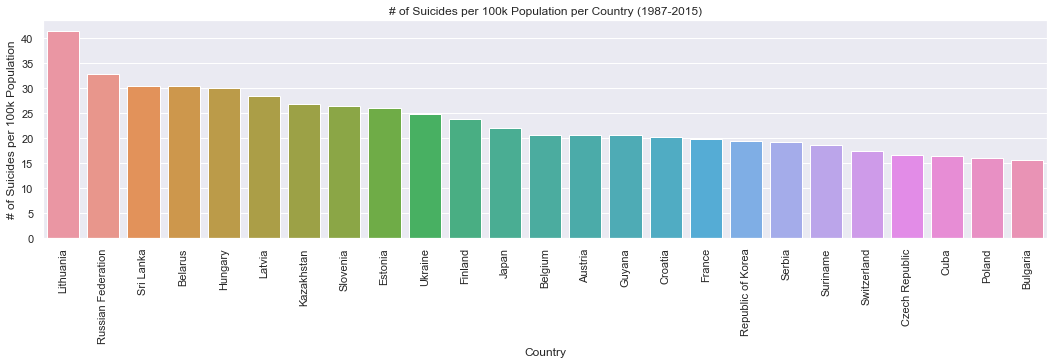

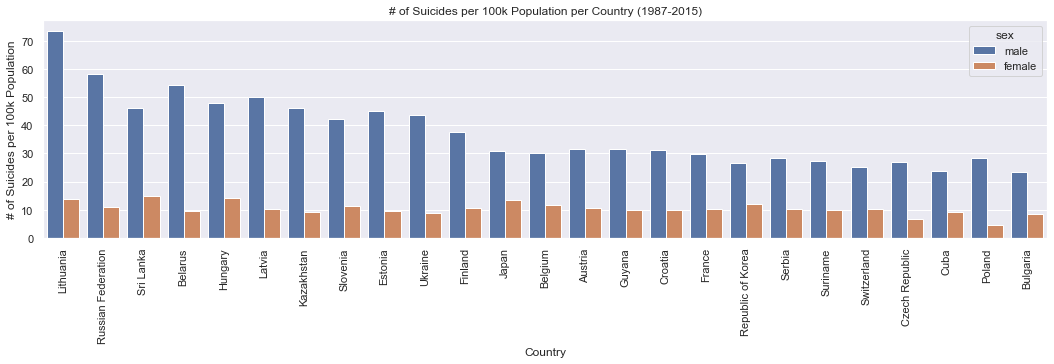

In [6]:
# create plot_df1
plot_df1 = df.groupby(['country']).agg({
    'suicides': 'sum', 
    'population': 'sum',
})
plot_df1['suicides/100k'] = (plot_df1['suicides'] / plot_df1['population']) * 100000

# create plot_df2
plot_df2 = df.groupby(['country', 'sex']).agg({
    'suicides': 'sum', 
    'population': 'sum',
})
plot_df2['suicides/100k'] = (plot_df2['suicides'] / plot_df2['population']) * 100000
plot_df2.reset_index(level=1, inplace=True)

# create an order for Seaborn plot
order = plot_df1.sort_values(by='suicides/100k', ascending=False).index

#create plot
fig, ax = plt.subplots(figsize=(18, 4))

sns.barplot(data=plot_df1,
            x=plot_df1.index.get_level_values('country'),
            y='suicides/100k',
            estimator=np.sum,
            ci=None,
            order=order[:25])
ax.set_title('# of Suicides per 100k Population per Country (1987-2015)')
ax.set_xlabel('Country')
ax.set_ylabel('# of Suicides per 100k Population')
plt.xticks(rotation=90)
# add format to y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides100k_per_country.png")

plt.show()

#create plot
fig, ax = plt.subplots(figsize=(18, 4))

sns.barplot(data=plot_df2,
            x=plot_df2.index.get_level_values('country'),
            y='suicides/100k',
            estimator=np.sum,
            ci=None,
            hue='sex',
            hue_order=['male', 'female'],
            order=order[:25])
ax.set_title('# of Suicides per 100k Population per Country (1987-2015)')
ax.set_xlabel('Country')
ax.set_ylabel('# of Suicides per 100k Population')
plt.xticks(rotation=90)
# add format to y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides100k_per_country_hue.png")

plt.show()

#### Plot - # of Suicides per 100k Population per Age Group

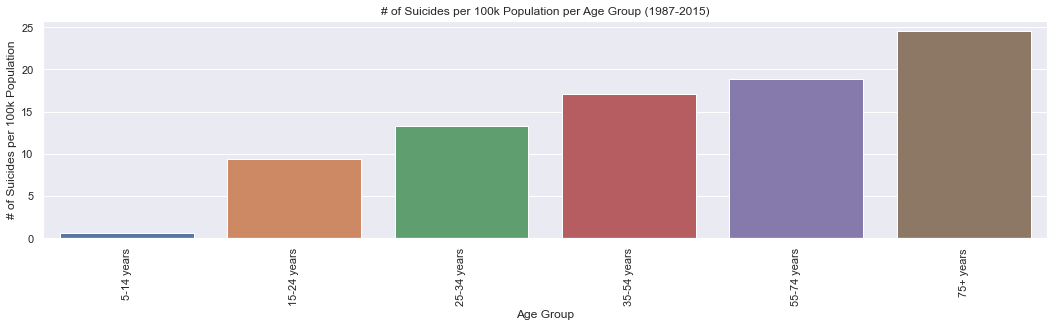

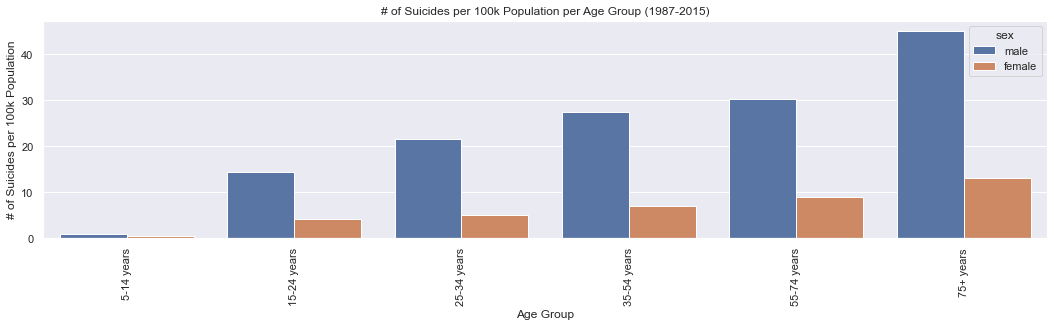

In [7]:
# create plot_df1
plot_df1 = df.groupby(['age']).agg({
    'suicides': 'sum', 
    'population': 'sum',
})
plot_df1['suicides/100k'] = (plot_df1['suicides'] / plot_df1['population']) * 100000

# create plot_df2
plot_df2 = df.groupby(['age', 'sex']).agg({
    'suicides': 'sum', 
    'population': 'sum',
})
plot_df2['suicides/100k'] = (plot_df2['suicides'] / plot_df2['population']) * 100000
plot_df2.reset_index(level=1, inplace=True)

# create an order for Seaborn plot
order = ['5-14 years',
         '15-24 years',
         '25-34 years',
         '35-54 years',
         '55-74 years',
         '75+ years']

#create plot
fig, ax = plt.subplots(figsize=(18, 4))

sns.barplot(data=plot_df1,
            x=plot_df1.index.get_level_values('age'),
            y='suicides/100k',
            estimator=np.mean,
            ci=None,
            order=order)
ax.set_title('# of Suicides per 100k Population per Age Group (1987-2015)')
ax.set_xlabel('Age Group')
ax.set_ylabel('# of Suicides per 100k Population')
plt.xticks(rotation=90)
# add format to y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides100k_per_age.png")

plt.show()

#create plot
fig, ax = plt.subplots(figsize=(18, 4))

sns.barplot(data=plot_df2,
            x=plot_df2.index.get_level_values('age'),
            y='suicides/100k',
            estimator=np.mean,
            ci=None,
            hue='sex',
            hue_order=['male', 'female'],
            order=order)
ax.set_title('# of Suicides per 100k Population per Age Group (1987-2015)')
ax.set_xlabel('Age Group')
ax.set_ylabel('# of Suicides per 100k Population')
plt.xticks(rotation=90)
# add format to y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides100k_per_age_hue.png")

plt.show()

#### Correlation Clustermap

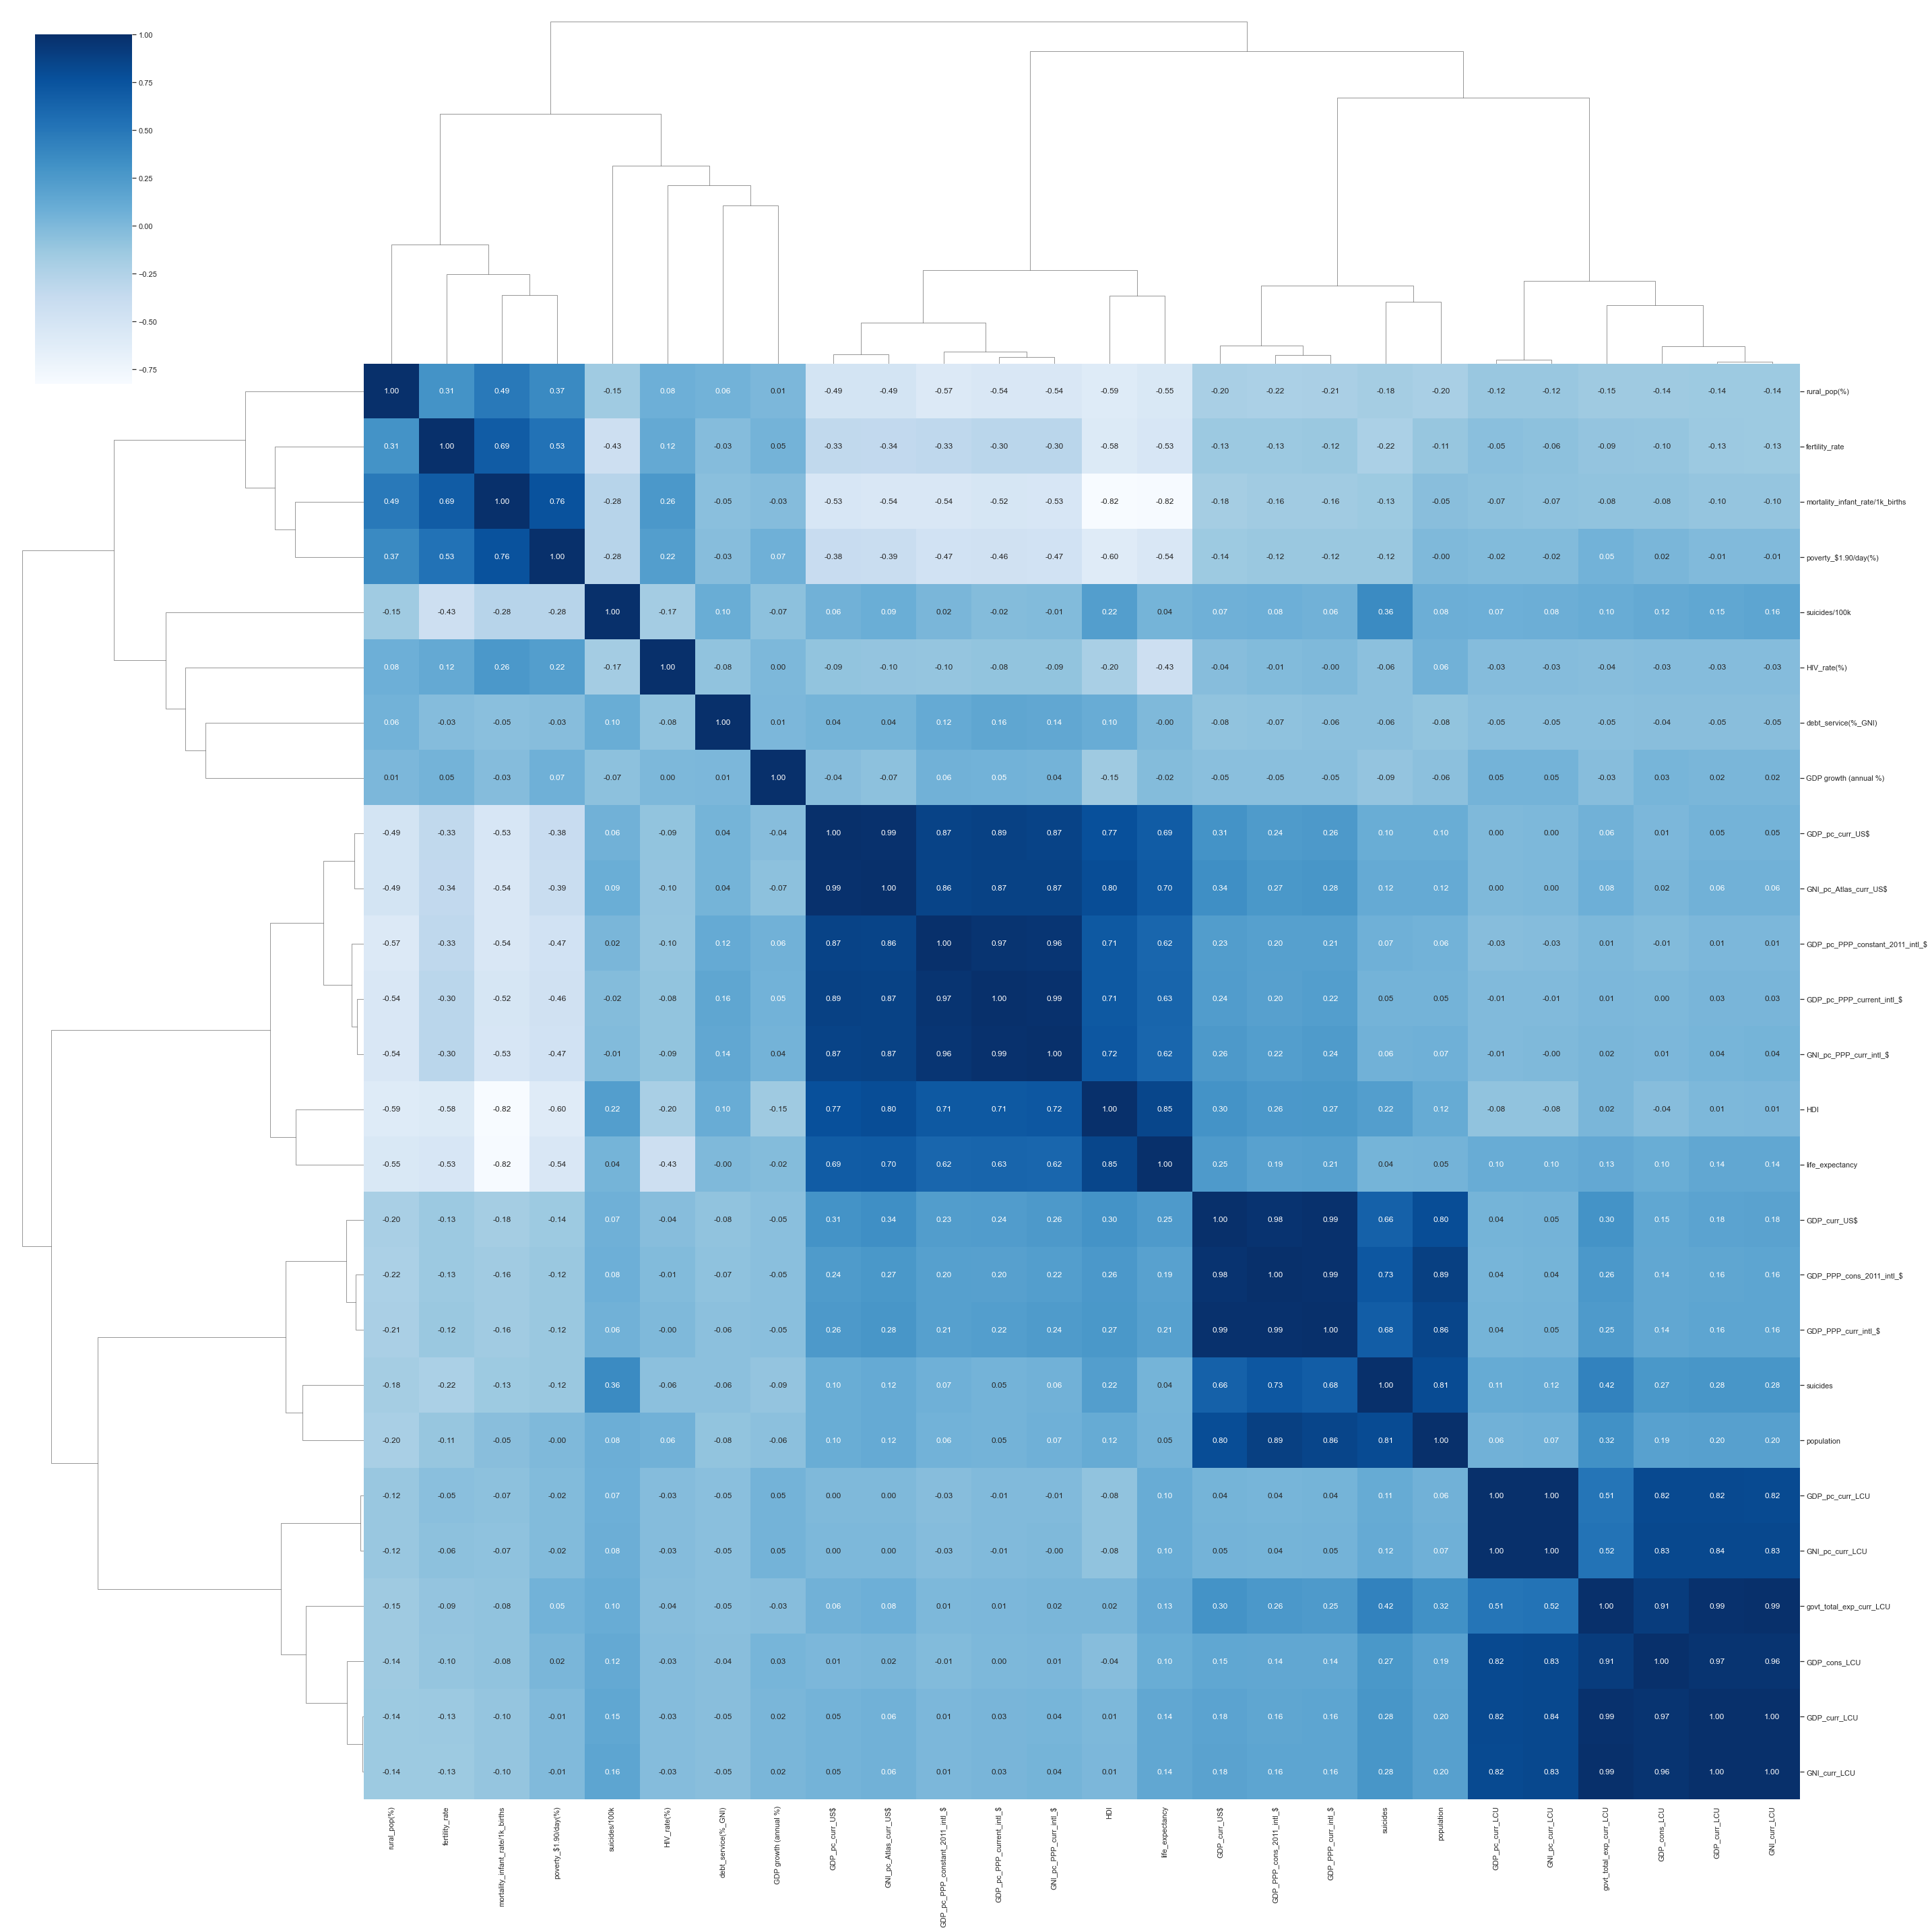

In [8]:
# add aggregation dictionary to a list comprehension
lc = {k:np.sum if k in {'suicides', 'population'} else np.mean for k in df.select_dtypes(include=[np.number]).columns}

# create a summary DataFrame
summary_df = df.groupby(['country', 'year']).agg(lc)
summary_df.reset_index(level=[1], inplace=True)
summary_df['suicides/100k'] = (summary_df['suicides'] / summary_df['population']) * 100000
summary_df.head(5)

sns.clustermap(summary_df.corr(), annot=True, fmt='.2f', cmap='Blues', figsize=(40,40))
plt.savefig('Images/clustermap.png')

#### Suicides vs Fertility Rate

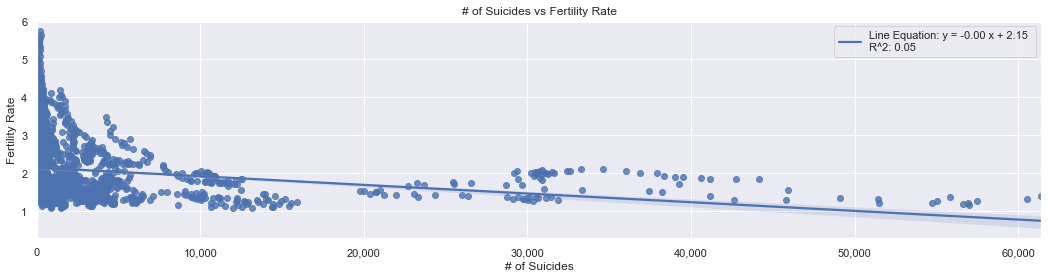

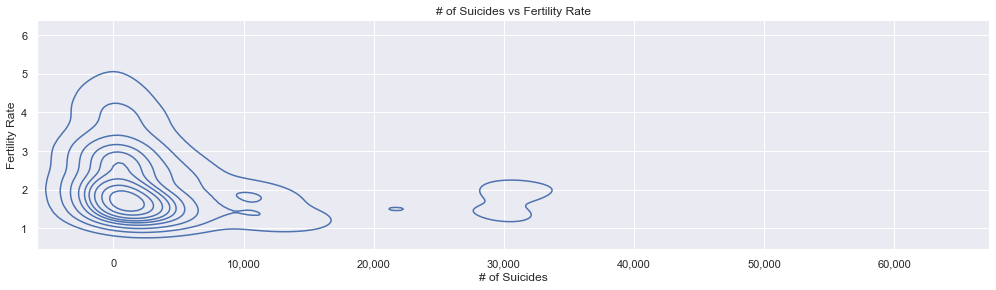

In [9]:
plot_df = summary_df[~(summary_df['fertility_rate'].isna())]

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = sts.linregress(plot_df['suicides'],plot_df['fertility_rate'])

# jointplot
plt.figure(figsize=(18,4))
sns.regplot(data=plot_df,
            x='suicides',
            y='fertility_rate',
            line_kws={'label':'Line Equation: y = {0:.2f} x + {1:.2f} \nR^2: {2:.2f}'.format(slope,intercept,r_value**2)})
plt.title('# of Suicides vs Fertility Rate')
plt.xlabel('# of Suicides')
plt.ylabel('Fertility Rate')
plt.legend()
# add format to x-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_vs_fertilityrate.png")

plt.show()

# bivariate KDE plot
sns.displot(data=plot_df, x='suicides', y='fertility_rate', height=4, aspect=3.5, kind='kde')
plt.title('# of Suicides vs Fertility Rate')
plt.xlabel('# of Suicides')
plt.ylabel('Fertility Rate')
# add format to x-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_vs_fertilityrate_kde.png")

plt.show()

#### Suicides vs Life Expectancy

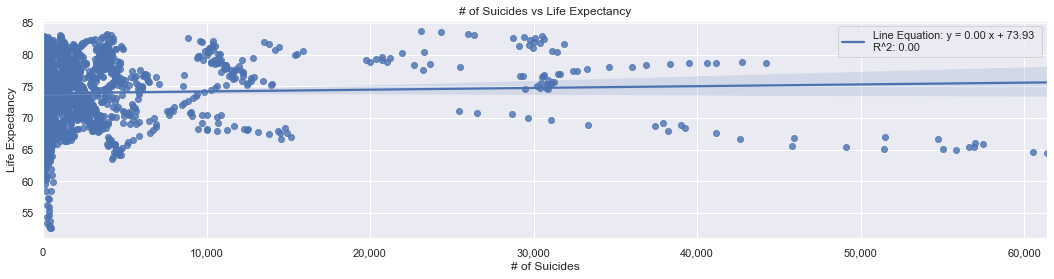

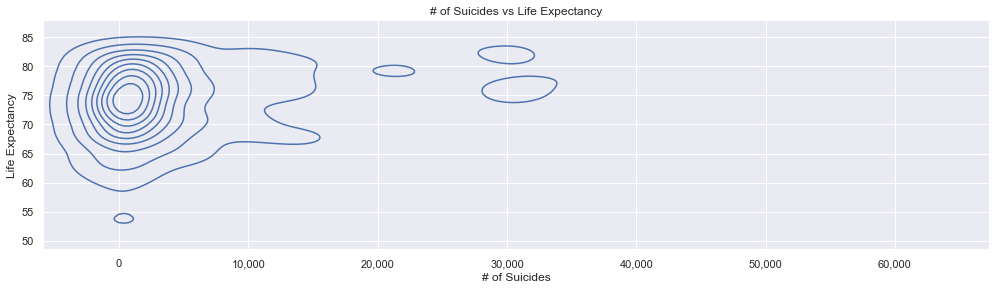

In [10]:
plot_df = summary_df[~(summary_df['life_expectancy'].isna())]
 
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = sts.linregress(plot_df['suicides'],plot_df['life_expectancy'])

# jointplot
plt.figure(figsize=(18,4))
sns.regplot(data=plot_df,
            x='suicides',
            y='life_expectancy',
            line_kws={'label':'Line Equation: y = {0:.2f} x + {1:.2f} \nR^2: {2:.2f}'.format(slope,intercept,r_value**2)})
plt.title('# of Suicides vs Life Expectancy')
plt.xlabel('# of Suicides')
plt.ylabel('Life Expectancy')
plt.legend()
# add format to x-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_vs_lifeexpectancy.png")

plt.show()

# bivariate KDE plot
sns.displot(data=plot_df, x='suicides', y='life_expectancy', height=4, aspect=3.5, kind='kde')
plt.title('# of Suicides vs Life Expectancy')
plt.xlabel('# of Suicides')
plt.ylabel('Life Expectancy')
# add format to x-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_vs_lifeexpectancy_kde.png")

plt.show()

#### Suicides vs HIV Rate

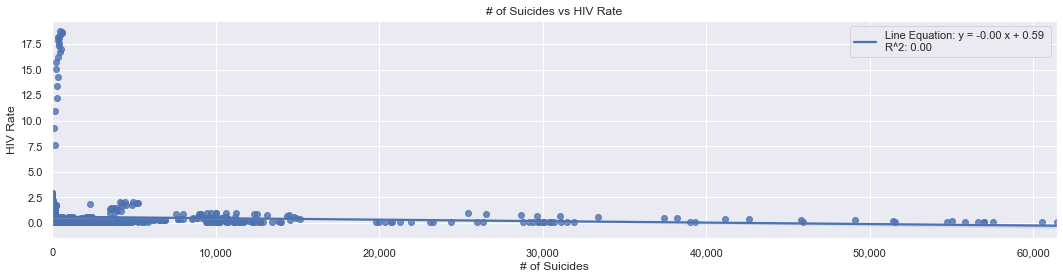

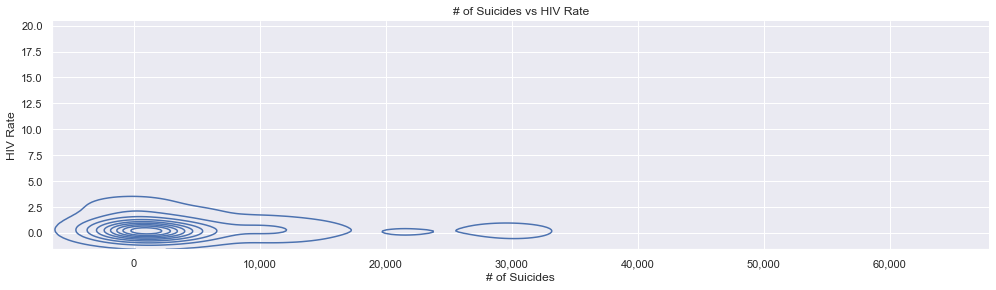

In [11]:
plot_df = summary_df[~(summary_df['HIV_rate(%)'].isna())]
 
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = sts.linregress(plot_df['suicides'],plot_df['HIV_rate(%)'])

# jointplot
plt.figure(figsize=(18,4))
sns.regplot(data=plot_df,
            x='suicides',
            y='HIV_rate(%)',
            line_kws={'label':'Line Equation: y = {0:.2f} x + {1:.2f} \nR^2: {2:.2f}'.format(slope,intercept,r_value**2)})
plt.title('# of Suicides vs HIV Rate')
plt.xlabel('# of Suicides')
plt.ylabel('HIV Rate')
plt.legend()
# add format to x-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_vs_HIVrate.png")

plt.show()

# bivariate KDE plot
sns.displot(data=plot_df, x='suicides', y='HIV_rate(%)', height=4, aspect=3.5, kind='kde')
plt.title('# of Suicides vs HIV Rate')
plt.xlabel('# of Suicides')
plt.ylabel('HIV Rate')
# add format to x-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_vs_HIVrate_kde.png")

plt.show()

#### Suicides vs GDP PPP (constant 2011 international $)

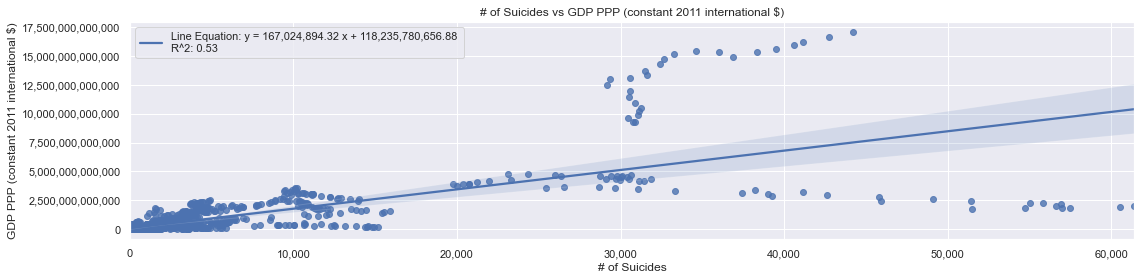

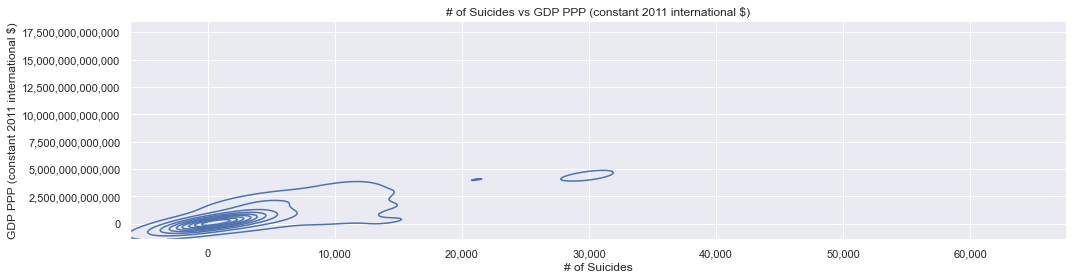

In [12]:
# PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. 
# An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States.

plot_df = summary_df[~(summary_df['GDP_PPP_cons_2011_intl_$'].isna())]
 
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = sts.linregress(plot_df['suicides'],plot_df['GDP_PPP_cons_2011_intl_$'])

# jointplot
plt.figure(figsize=(18,4))
sns.regplot(data=plot_df,
            x='suicides',
            y='GDP_PPP_cons_2011_intl_$',
            line_kws={'label':'Line Equation: y = {0:,.2f} x + {1:,.2f} \nR^2: {2:,.2f}'.format(slope,intercept,r_value**2)})
plt.title('# of Suicides vs GDP PPP (constant 2011 international $)')
plt.xlabel('# of Suicides')
plt.ylabel('GDP PPP (constant 2011 international $)')
plt.legend()
# add format to x-axis and y-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_vs_GDP_PPP.png")

plt.show()

# bivariate KDE plot
sns.displot(data=plot_df, x='suicides', y='GDP_PPP_cons_2011_intl_$', height=4, aspect=3.5, kind='kde')
plt.title('# of Suicides vs GDP PPP (constant 2011 international $)')
plt.xlabel('# of Suicides')
plt.ylabel('GDP PPP (constant 2011 international $)')
# add format to x-axis and y-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_vs_GDP_PPP_kde.png")

plt.show()

#### Suicides by Age Group and Sex

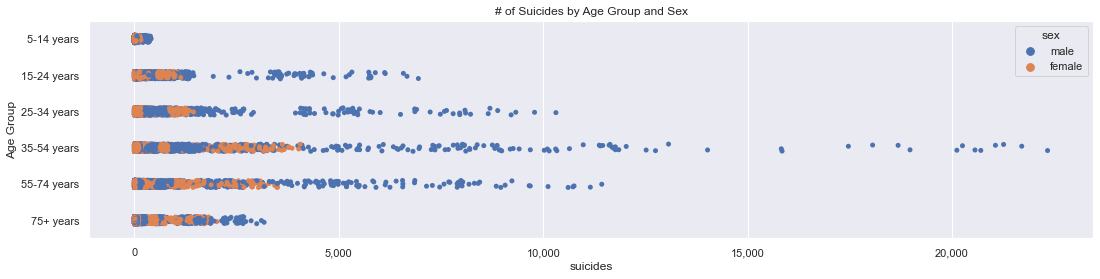

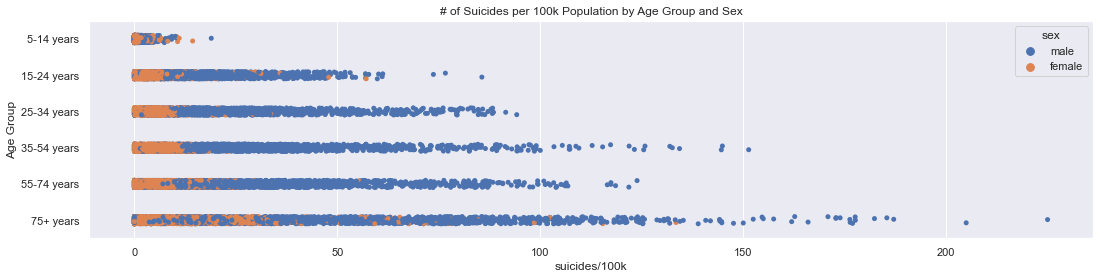

In [13]:
# copy DataFrame
plot_df = df.copy()

# create an order for Seaborn plot
order = ['5-14 years',
         '15-24 years',
         '25-34 years',
         '35-54 years',
         '55-74 years',
         '75+ years']

hue_order = ['male', 'female']

plt.figure(figsize=(18,4))
sns.stripplot(data=plot_df, y='age', x='suicides', jitter=True, hue='sex', hue_order=hue_order, order=order)
plt.title('# of Suicides by Age Group and Sex')
plt.ylabel('Age Group')
# add format to x-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_age_sex.png")

plt.show()

plt.figure(figsize=(18,4))
sns.stripplot(data=plot_df, y='age', x='suicides/100k', jitter=True, hue='sex', hue_order=hue_order, order=order)
plt.title('# of Suicides per 100k Population by Age Group and Sex')
plt.ylabel('Age Group')
# add format to x-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_age_sex_hue.png")

plt.show()

### Regression Analysis

In [14]:
df.head()

,country,year,sex,age,suicides,population,suicides/100k,generation,HDI,fertility_rate,...,GDP_pc_curr_LCU,GDP_pc_curr_US$,GDP_pc_PPP_constant_2011_intl_$,GDP_pc_PPP_current_intl_$,GDP_PPP_cons_2011_intl_$,GDP_PPP_curr_intl_$,GNI_curr_LCU,GNI_pc_curr_LCU,GNI_pc_Atlas_curr_US$,GNI_pc_PPP_curr_intl_$
0,Albania,1987,male,15-24 years,21,312900,6.71,Generation X,NaN,3.164,...,5398.34706,674.79338,NaN,NaN,NaN,NaN,1.664957e+10,5399.38481,730.0,NaN
1,Albania,1987,male,35-54 years,16,308000,5.19,Silent,NaN,3.164,...,5398.34706,674.79338,NaN,NaN,NaN,NaN,1.664957e+10,5399.38481,730.0,NaN
2,Albania,1987,female,15-24 years,14,289700,4.83,Generation X,NaN,3.164,...,5398.34706,674.79338,NaN,NaN,NaN,NaN,1.664957e+10,5399.38481,730.0,NaN
3,Albania,1987,male,75+ years,1,21800,4.59,G.I. Generation,NaN,3.164,...,5398.34706,674.79338,NaN,NaN,NaN,NaN,1.664957e+10,5399.38481,730.0,NaN
4,Albania,1987,male,25-34 years,9,274300,3.28,Boomers,NaN,3.164,...,5398.34706,674.79338,NaN,NaN,NaN,NaN,1.664957e+10,5399.38481,730.0,NaN


In [15]:
df.fillna(0, inplace= True)
df.describe()

,suicides,population,suicides/100k,HDI,fertility_rate,life_expectancy,mortality_infant_rate/1k_births,poverty_$1.90/day(%),HIV_rate(%),rural_pop(%),...,GDP_pc_curr_LCU,GDP_pc_curr_US$,GDP_pc_PPP_constant_2011_intl_$,GDP_pc_PPP_current_intl_$,GDP_PPP_cons_2011_intl_$,GDP_PPP_curr_intl_$,GNI_curr_LCU,GNI_pc_curr_LCU,GNI_pc_Atlas_curr_US$,GNI_pc_PPP_curr_intl_$
count,27660.000000,2.766000e+04,27660.000000,27660.000000,27660.000000,27660.000000,27660.000000,27660.000000,27660.000000,27660.000000,...,2.766000e+04,27660.000000,27660.000000,27660.000000,2.766000e+04,2.766000e+04,2.766000e+04,2.766000e+04,27660.000000,27660.000000
mean,243.413485,1.850689e+06,12.812597,0.234833,2.077914,73.750971,14.933449,1.467722,0.347852,33.219530,...,6.483556e+05,15627.066553,20642.539192,17733.605519,5.419026e+11,4.615939e+11,2.274979e+13,6.261634e+05,14727.765727,16996.702820
std,904.490185,3.920658e+06,18.972063,0.360369,0.757036,6.534638,14.012456,4.889869,1.513345,18.720069,...,2.677153e+06,17615.524265,19113.294772,17547.907051,1.583112e+12,1.424114e+12,1.196483e+14,2.622913e+06,16765.678323,16975.738231
min,0.000000,2.780000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,3.000000,9.753525e+04,0.910000,0.000000,1.540000,70.770000,5.100000,0.000000,0.000000,18.701000,...,8.930769e+03,3067.219100,7386.830180,5655.698820,9.141968e+09,7.348399e+09,1.402197e+10,7.999148e+03,2790.000000,5340.000000
50%,25.000000,4.307250e+05,5.980000,0.000000,1.874000,74.410000,9.900000,0.000000,0.100000,31.853000,...,2.457141e+04,8535.046880,15218.793920,12664.990680,8.111100e+10,6.582886e+10,1.759294e+11,2.331965e+04,7590.000000,11960.000000
75%,132.000000,1.491041e+06,16.602500,0.679000,2.480000,77.670730,19.300000,0.200000,0.200000,46.664000,...,8.730632e+04,23121.601140,31599.120680,26097.871900,3.536956e+11,3.015219e+11,1.357355e+12,8.181987e+04,21710.000000,24970.000000
max,22338.000000,4.380521e+07,224.970000,0.944000,5.757000,83.793900,76.500000,62.100000,18.800000,81.712000,...,3.066011e+07,118823.648370,129349.916350,129349.916350,1.705953e+13,1.821930e+13,1.568383e+15,3.074360e+07,104540.000000,125200.000000


In [16]:
#1 Fertility Rate & Life Expectancy vs Suicides
x=df[["fertility_rate", "life_expectancy"]]
y= df[["suicides"]]

In [17]:
x, y = np.array(x), np.array(y)

In [18]:
x = sm.add_constant(x)

In [19]:
model = sm.OLS(y, x)

In [20]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     265.8
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          4.43e-115
Time:                        20:19:47   Log-Likelihood:            -2.2728e+05
No. Observations:               27660   AIC:                         4.546e+05
Df Residuals:                   27657   BIC:                         4.546e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        691.9057     69.389      9.971      0.0

In [21]:
print('The predicted responses for life expectancy and fertility rate that impact on Suicides are :', results.predict(x), sep='\n')

The predicted responses for life expectancy and fertility rate that impact on Suicides are :
[ 64.78657226  64.78657226  64.78657226 ... 183.84172828 183.84172828
 183.84172828]


In [22]:
#2 Fertility rate & Life Expectancy vs Suicides/100k
x=df[["fertility_rate", "life_expectancy"]]
y=df[["suicides/100k"]]

In [23]:
x, y = np.array(x), np.array(y)

In [24]:
x = sm.add_constant(x)

In [25]:
model = sm.OLS(y, x)

In [26]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     602.9
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          5.21e-257
Time:                        20:19:47   Log-Likelihood:            -1.2006e+05
No. Observations:               27660   AIC:                         2.401e+05
Df Residuals:                   27657   BIC:                         2.401e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.2210      1.438     23.792      0.0

In [27]:
print('The predicted responses for life expectancy and fertility rate that impact on Suicides are :', results.predict(x), sep='\n')

The predicted responses for life expectancy and fertility rate that impact on Suicides are :
[ 7.3081515   7.3081515   7.3081515  ... 11.17420967 11.17420967
 11.17420967]


In [28]:
#3 GDP per capita purchasing power parity & poverty % vs Suicides for 100K
x=df[["GDP_pc_PPP_constant_2011_intl_$", "poverty_$1.90/day(%)"]]
y=df[["suicides/100k"]]

In [29]:
x, y = np.array(x), np.array(y)

In [30]:
x = sm.add_constant(x)

In [31]:
model = sm.OLS(y, x)

In [32]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     65.43
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           4.50e-29
Time:                        20:19:47   Log-Likelihood:            -1.2058e+05
No. Observations:               27660   AIC:                         2.412e+05
Df Residuals:                   27657   BIC:                         2.412e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6483      0.178     76.849      0.0

In [33]:
#4 Fertility Rate, Poverty & Infant Mortality vs Suicides for a 100k 
x=df[["fertility_rate", "poverty_$1.90/day(%)", "mortality_infant_rate/1k_births"]]
y=df[["suicides/100k"]]

In [34]:
x, y = np.array(x), np.array(y)

In [35]:
x = sm.add_constant(x)

In [36]:
model = sm.OLS(y, x)

In [37]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     392.2
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          1.54e-249
Time:                        20:19:47   Log-Likelihood:            -1.2007e+05
No. Observations:               27660   AIC:                         2.402e+05
Df Residuals:                   27656   BIC:                         2.402e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5777      0.348     67.744      0.0

In [38]:
#5  Fertility Rate, Life Expectancy & GDP per capita as PPP vs Suicides for a 100k
x=df[["fertility_rate", "life_expectancy", "GDP_pc_PPP_constant_2011_intl_$"]]
y=df[["suicides/100k"]]

In [39]:
x, y = np.array(x), np.array(y)

In [40]:
x = sm.add_constant(x)

In [41]:
model = sm.OLS(y, x)

In [42]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     447.3
Date:                Wed, 17 Feb 2021   Prob (F-statistic):          8.78e-284
Time:                        20:19:47   Log-Likelihood:            -1.1999e+05
No. Observations:               27660   AIC:                         2.400e+05
Df Residuals:                   27656   BIC:                         2.400e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.3376      1.457     21.507      0.0

In [43]:
#6 GDP Growth & purchasing power parity vs Suicides for 100K
x=df[["GDP growth (annual %)"  , "GDP_pc_PPP_constant_2011_intl_$"]]
y=df[["suicides/100k"]]

In [44]:
x, y = np.array(x), np.array(y)

In [45]:
x = sm.add_constant(x)

In [46]:
model = sm.OLS(y,x)

In [47]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     16.79
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           5.15e-08
Time:                        20:19:48   Log-Likelihood:            -1.2063e+05
No. Observations:               27660   AIC:                         2.413e+05
Df Residuals:                   27657   BIC:                         2.413e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3623      0.181     73.778      0.0

### Conclusion
* Men commit a lot more suicide than women, not only in general, divided by country, and age group, men can commit up to 5 times more suicide than women.
* With the age group we analyzed 5-14, 15-24, 25-34, 35-54, 55-74, 75+, there is a tendency where the older you are, the most likely you are to commit suicide.
* From all the demographic indicators we analyzed, we weren't able to find any correlation with suicide/100k population.
* The suicides/100k population started growing significantly in 1989, and peaked at 1995, from there we have had a reduction in the suicides/100k population.
* Our regression models did not offer significant insight on any possible correlation.